In [1]:
#2022-10-24 14:34:59 
import os
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

from matplotlib import font_manager
# Add every font at the specified location
font_dir = ['/home/UTHSCSA/hef/Tools/miniconda3/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Arial'


import matplotlib.pyplot as plt
import scipy as sp


from datetime import datetime
time = datetime.now().strftime("%Y_%m_%d")

import matplotlib.gridspec as gridspec


In [2]:
## add cancer info
cancer = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt')
cancer = cancer[['ID','Final Diagnosis (Laura)','Disease Code level 2', 'Disease Code level 1', 'Tumor Collected (Primary or Met)','Gender','Age(year)','Therapy prior to PDX collection']]
def add_cancer_info(data, column):
    k = []
    for ids in list(data[column]):
        if str(ids) in list(cancer['ID']):
            k.append(list(cancer[cancer['ID'] == str(ids)].iloc[0]))
        else:
            k.append(['NA'] * 8)
    data[['PDXID','Tumor Class','Tumor group','Tumor group2', 'Primary or Met','Gender','Age(year)','Therapy prior to PDX collection'] ]= pd.DataFrame(k)
    return data



In [3]:
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

cancer_ranking_all = [ 'Osteosarcoma', 'Clear Cell Sarcoma', 'Other Sarcoma',   'Wilms Tumor', 'Hepatoblastoma','Germ Cell Tumor',   'Neuroblastoma', 'Other Tumor']
color_ranking_all = ['brg', 'Oranges', 'Reds', 'Greens_r', 'Purples_r', 'Blues_r',  'nipy_spectral', 'Greys_r']

color_ranking_palette = [ f(.6), f(.8), f(.3), h(.6), b(.6), a(.6), h(.2), e(.6)]

cancer_ranking_all2 = [ 'Ovarian tumor', 'Wilms Tumor', 'Ewing Sarcoma', 'Mesothelioma', 'Clear Cell Sarcoma', 'Hepatoblastoma', 'Neuroblastoma',
                        'Germ Cell Tumor', 'Pleomorphic Sarcoma', 'Adrenal cortical carcinoma', 'Osteosarcoma', 'ERMS', 'Glioblastoma']
color_ranking_palette2 = ['darkred',h(.6), 'red', 'gold', f(.3), b(.6), h(.2),a(.6), 'firebrick', 'hotpink', f(.6), f(.7), 'darkviolet']

cancer_ranking_all3= [ 'Sarcoma',   'Wilms Tumor', 'Hepatoblastoma','Germ Cell Tumor',   'Neuroblastoma', 'Other Tumor']
color_ranking_palette3 = [ f(.6), h(.6), b(.6), a(.6), h(.2), e(.6)]


In [5]:
cancer2 = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt')
en_time = cancer2[['ID','Disease Code level 2', 'Disease Code level 1','Engraftment time (P0-P1)', 'Therapy prior to PDX collection']]
en_time = en_time[en_time['Engraftment time (P0-P1)'].notna()]

In [6]:
dt = en_time
cancer_ranking = list(dt.groupby('Disease Code level 1').mean().sort_values('Engraftment time (P0-P1)', ascending=False).index)
color_ranking = [color_ranking_palette[cancer_ranking_all.index(i)]  for i in cancer_ranking ]

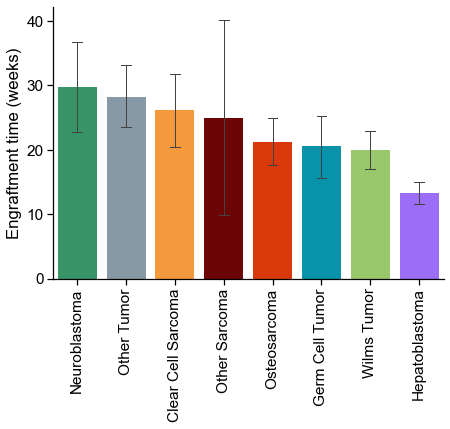

In [7]:
sns.set_context('notebook',font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig, ax = plt.subplots( figsize = (7,5 ))
p = sns.barplot(data = dt, x="Disease Code level 1", y="Engraftment time (P0-P1)", order=cancer_ranking, palette= color_ranking,
                ci=68,  capsize=.2, errwidth = 1, n_boot=10000, saturation=0.9, 
               )

plt.ylabel('Engraftment time (weeks)')
plt.xlabel('')
plt.xticks(rotation = 90)
sns.despine()
#plt.savefig('/home/UTHSCSA/hef/2.Project/5.PDX/3.plot/1.data_distribution/Engraftment_time.barplot.SE.'+time+'.pdf', format='pdf', dpi = 600,  bbox_inches='tight')

In [8]:
en_time.groupby('Disease Code level 1').mean().T[cancer_ranking].T[['Engraftment time (P0-P1)']]

,Engraftment time (P0-P1)
Disease Code level 1,
Neuroblastoma,29.750000
Other Tumor,28.277778
Clear Cell Sarcoma,26.166667
Other Sarcoma,25.000000
Osteosarcoma,21.250000
Germ Cell Tumor,20.600000
Wilms Tumor,20.000000
Hepatoblastoma,13.291667


In [9]:
rate = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/success_rate.txt', sep = '\t',index_col=0).sort_values('Success rate', ascending = False)
#rate[rate['# of Transplanted'] > 10]
rate

,# of Transplanted,# of PDX obtained,Success rate,Samples
Clear Cell Sarcoma,3,3,1.000000,3
Wilms Tumor,21,18,0.857143,14
Osteosarcoma,21,14,0.666667,13
Sarcoma,35,21,0.600000,19
Other Sarcoma,12,6,0.500000,3
Germ Cell Tumor,25,12,0.480000,10
Hepatoblastoma,34,15,0.441176,13
Neuroblastoma,19,5,0.263158,4
Brain Tumor,22,5,0.227273,3


In [10]:
ranking = ['Clear Cell Sarcoma','Wilms Tumor', 'Osteosarcoma','Other Sarcoma', 'Germ Cell Tumor', 'Hepatoblastoma', 'Neuroblastoma', 'Brain Tumor']
pal =  [color_ranking_palette[cancer_ranking_all.index(i)]  for i in ranking if i in cancer_ranking_all ] + ['darkviolet']

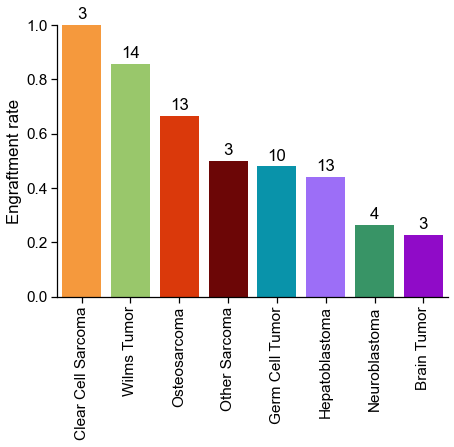

In [11]:
sns.set_context('notebook',font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig, ax = plt.subplots( figsize = (7,5 ))
p = sns.barplot(data = rate.reset_index(), x="index", y="Success rate", order=ranking, palette= pal,
                ci=68,  capsize=.2, errwidth = 1, n_boot=10000, saturation=0.9,
               )


plt.ylabel('Engraftment rate')
plt.xlabel('')
plt.xticks(rotation = 90)
plt.ylim(0,1)
text_x = [-0.2,0.8,1.8,2.8,3.8,4.8,5.8,6.8]
tb = [int(rate.loc[ranking[i]]['Samples']) for i in range(len(text_x))]
p.bar_label(p.containers[0],  labels=tb, padding=3)

sns.despine()

#plt.savefig('/home/UTHSCSA/hef/2.Project/5.PDX/3.plot/1.data_distribution/Engraftment_rate.barplot.'+time+'.pdf', format='pdf', dpi = 600,  bbox_inches='tight')

In [12]:
info = pd.read_table( '/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt', sep = '\t', index_col=0)

df = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/3.plot/1.data_distribution/pdx_dis.table.txt', sep = '\t', header=[0,1], index_col=0)
df = df.drop('1837', axis = 0)
#df = df.drop('1947', as = 0)
df 

ID                 RNAseq                                WES                  \
                      PDX              PT           Germline             PDX   
1739      1739_PDX_RNAseq  1739_PT_RNAseq                  /    1739_PDX_WES   
1753      1753_PDX_RNAseq               /  1753_Germline_WES    1753_PDX_WES   
1754      1754_PDX_RNAseq  1754_PT_RNAseq  1754_Germline_WES    1754_PDX_WES   
1763      1763_PDX_RNAseq               /                  /    1763_PDX_WES   
1792      1792_PDX_RNAseq  1792_PT_RNAseq  1792_Germline_WES    1792_PDX_WES   
...                   ...             ...                ...             ...   
891173  891173_PDX_RNAseq               /                  /  891173_PDX_WES   
891760  891760_PDX_RNAseq               /                  /  891760_PDX_WES   
892257  892257_PDX_RNAseq               /                  /  892257_PDX_WES   
895452  895452_PDX_RNAseq               /                  /  895452_PDX_WES   
896751                  /               /                  /  896751_PDX_WES   

ID                                 WGS                               
                 PT           Germline             PDX           PT  
1739    1739_PT_WES                  /    1739_PDX_WGS  1739_PT_WGS  
1753    1753_PT_WES  1753_Germline_WGS    1753_PDX_WGS  1753_PT_WGS  
1754    1754_PT_WES  1754_Germline_WGS    1754_PDX_WGS  1754_PT_WGS  
1763    1763_PT_WES                  /    1763_PDX_WGS  1763_PT_WGS  
1792    1792_PT_WES  1792_Germline_WGS    1792_PDX_WGS  1792_PT_WGS  
...             ...                ...             ...          ...  
891173            /                  /  891173_PDX_WGS            /  
891760            /                  /  891760_PDX_WGS            /  
892257            /                  /  892257_PDX_WGS            /  
895452            /                  /  895452_PDX_WGS            /  
896751            /                  /  896751_PDX_WGS            /  

[70 rows x 8 columns]

In [13]:
df[df == '/'] = np.nan
df = df. where(~df.notna(), 1).fillna(0)

df['Sum'] = df.T.sum()

df['Tumor_group']  = [info.loc[i]['Disease Code level 1'] for i in list(df.index) ] 
df['Race']  = [info.loc[i]['Race'] for i in list(df.index) ] 
df['Ethnicity']  = [info.loc[i]['Ethnicity'] for i in list(df.index) ] 
df['Gender']  = [info.loc[i]['Gender'] for i in list(df.index) ] 
df['Age']  = [info.loc[i]['Age(year)'] for i in list(df.index) ] 
df['Primary']  = [info.loc[i]['Tumor Collected (Primary or Met)'] for i in list(df.index) ] 
df['Therapy']  = [info.loc[i]['Therapy prior to PDX collection'] for i in list(df.index) ] 

In [14]:
dt = df.replace(' $', '', regex = True)

dt = dt.replace('Germ Cell Tumor', 0).replace('Hepatoblastoma', 1).replace('Osteosarcoma', 2).replace('Clear Cell Sarcoma', 3).replace('Other Sarcoma', 4).replace('Wilms Tumor', 5).replace('Neuroblastoma', 6).replace('Other Tumor', 7)
dt = dt.replace('Not Hispanic or Latino', 1).replace('Non-Hispanic', 1).replace('Hispanic', 2).replace('Hispanic or Latino', 2)
dt = dt.replace('Other', 0).replace('Asian/Filipino', 1).replace('Asian', 1).replace('White', 2).replace('Black or AA', 3).replace('AA', 3).replace('White (Arabic)', 2)
dt = dt.replace('Male', 1).replace('Female', 2)
dt = dt.replace('primary', 1).replace('primary/recurrent', 1).replace('metastatic', 2)
dt = dt.replace('no treatment', 1).replace('No treatment', 1).replace('Chemotherapy', 2).replace('chemotherapy', 2).replace('radiation', 3).replace('Yes (unspecified)', 3)
dt = dt.replace('P', 1).replace('R', 2)

dt = dt.fillna(0).astype(int).reset_index().sort_values(['Tumor_group','Sum','index'],  ascending=[True, False, True]).set_index('index')

ht = dt[['RNAseq','WES','WGS']].T.reset_index()
ht.columns = ['Seqtype', 'Datatype'] + list(ht.columns[2:])
ht = ht.set_index(['Seqtype', 'Datatype'])

In [15]:
# custom colormap

a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

tumor_color = {'Germ Cell Tumor':a(.6),'Hepatoblastoma':b(.6), 
               'Osteosarcoma':f(.6),'Clear Cell Sarcoma':f(.8), 'Other Sarcoma':f(.3),
               'Wilms Tumor':h(.6), 'Neuroblastoma':h(.2),  'Other Tumor':e(.6)}
tumor_cmap = mpl.colors.LinearSegmentedColormap.from_list("", list(tumor_color.values()), N=len(tumor_color))
tumor_ranking = list(tumor_color.keys())

seqtype_color = {'RNAseq':e(.6),'WES':g(.4), 'WGS':c(.7)}
seqtype_cmap = mpl.colors.LinearSegmentedColormap.from_list("", list(tumor_color.values()), N=len(seqtype_color))

[Text(0, 0.5, 'Germline'), Text(0, 1.5, 'PDX'), Text(0, 2.5, 'PT')]

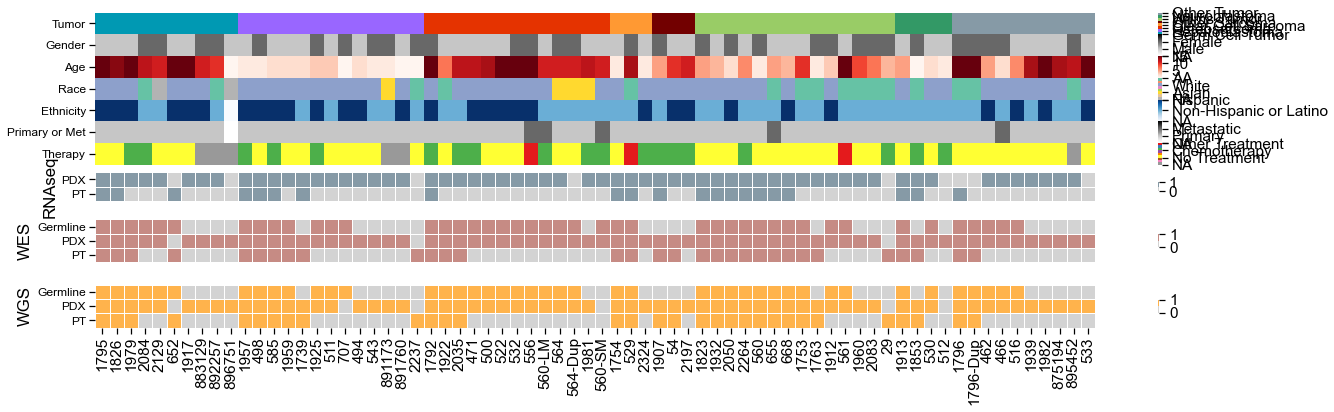

In [16]:
fig, ax = plt.subplots(figsize=(28,6))
gs = gridspec.GridSpec(10,2, wspace=0 , hspace=0, height_ratios=[1.5,1.5,1.5,1.5,1.5,1.5,1.5,3,4.5,4.5], width_ratios=[16,4]) #不同图片间隔

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[3, 0])
ax5 = plt.subplot(gs[4, 0])
ax6 = plt.subplot(gs[5, 0])
ax7 = plt.subplot(gs[6, 0])

ax_1 = plt.subplot(gs[7, 0])
ax_2= plt.subplot(gs[8, 0])
ax_3 = plt.subplot(gs[9, 0])

# Tumor group
g1 = sns.heatmap(
            dt[['Tumor_group']].T.astype(int),
            cmap=tumor_cmap, cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax1,
            vmax = 7, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None, yticks = [0.5])
#g1.set_yticks([0.5])
g1.set_yticklabels(['Tumor'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([0,1,2,3,4,5,6,7])
colorbar.set_ticklabels(tumor_ranking)

#Gender
g1 = sns.heatmap(
            dt[['Gender']].T.astype(int),
            cmap='Greys', cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax2,
            vmax = 3, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None , yticks = [0.5])
g1.set_yticklabels(['Gender'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([0,1,2])
colorbar.set_ticklabels(['NA','Male', 'Female'])

#Age
g1 = sns.heatmap(
            dt[['Age']].T.astype(int),
            cmap='Reds', cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax3,
            vmax = 15, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None, yticks = [0.5])
g1.set_yticklabels(['Age'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([5,10,15])
colorbar.set_ticklabels(['5','10', '15'])


#Race
g1 = sns.heatmap(
            dt[['Race']].T.astype(int),
            cmap='Set2_r', cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax4,
            vmax = 3, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None, yticks = [0.5])
g1.set_yticklabels(['Race'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([0,1,2,3])
colorbar.set_ticklabels(['NA', 'Asian', 'White', 'AA'])


#Ethnicity
g1 = sns.heatmap(
            dt[['Ethnicity']].T.astype(int),
            cmap='Blues', cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax5,
            vmax = 2, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None, yticks = [0.5])
g1.set_yticklabels(['Ethnicity'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([0,1,2])
colorbar.set_ticklabels(['NA', 'Non-Hispanic or Latino', 'Hispanic'])


#Primary or Met
g1 = sns.heatmap(
            dt[['Primary']].T.astype(int),
            cmap='Greys', cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax6,
            vmax = 3, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None, yticks = [0.5])
g1.set_yticklabels(['Primary or Met'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([0,1,2])
colorbar.set_ticklabels(['NA', 'Primary', 'Metastatic'])


#Treatment prior to PDX collection 
g1 = sns.heatmap(
            dt[['Therapy']].T.astype(int),
            cmap='Set1_r', cbar_kws={"aspect": 5},
            xticklabels = False, ax = ax7,
            vmax = 3, vmin = 0,  
        )
g1.set(xlabel=None, ylabel=None, yticks = [0.5])
g1.set_yticklabels(['Therapy'], rotation = 0, fontsize = 12) 
colorbar = g1.collections[0].colorbar
colorbar.set_ticks([0,1,2,3])
colorbar.set_ticklabels(['NA', 'No Treatment', 'Chemotherapy', 'Other Treatment'])


# heatmap - Blues
g2 = sns.heatmap(ht.T[['RNAseq']].T.reset_index().drop('Seqtype',axis =1).set_index('Datatype'), 
                 cmap=mpl.colors.LinearSegmentedColormap.from_list("", ['#D3D3D3'] + [seqtype_color['RNAseq']], N=2),
            xticklabels=False, square=True, cbar = True, cbar_kws={"aspect": 8, "shrink": .2},
            vmin = 0, vmax = 1, linewidths=1, ax = ax_1)
g2.set(xlabel=None, ylabel = 'RNAseq')
g2.set_yticks([0.5,1.5])
g2.set_yticklabels(['PDX', 'PT'], rotation = 0, fontsize = 12) 

g3 = sns.heatmap(ht.T[['WES']].T.reset_index().drop('Seqtype',axis =1).set_index('Datatype'), 
                 cmap=mpl.colors.LinearSegmentedColormap.from_list("", ['#D3D3D3'] + [seqtype_color['WES']], N=2), 
            xticklabels=False, square=True, cbar = True, cbar_kws={"aspect": 8, "shrink": .2},
            vmin = 0, vmax = 1, linewidths=1, ax = ax_2)
g3.set(xlabel=None, ylabel = 'WES')
g3.set_yticks([0.5,1.5,2.5])
g3.set_yticklabels(['Germline','PDX', 'PT'], rotation = 0, fontsize = 12) 

g3 = sns.heatmap(ht.T[['WGS']].T.reset_index().drop('Seqtype',axis =1).set_index('Datatype'), 
                 cmap=mpl.colors.LinearSegmentedColormap.from_list("", ['#D3D3D3'] + [seqtype_color['WGS']], N=2),
            xticklabels=True, square=True, cbar = True, cbar_kws={"aspect": 8, "shrink": .2},
            vmin = 0, vmax = 1, linewidths=1, ax = ax_3)
g3.set(xlabel=None, ylabel = 'WGS')
g3.set_yticks([0.5,1.5,2.5])
g3.set_yticklabels(['Germline','PDX', 'PT'], rotation = 0, fontsize = 12) 

#plt.savefig(indir+'/All_info.heatmap.raw.'+time+'.pdf', format='pdf', dpi = 600,  bbox_inches='tight')
